In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [3]:
# Generate random samples
def draw_sample(m, n):
    return np.random.uniform(-1.0, 1.0, size=[m, n])

# Generate samples uniformly from grid
def draw_sample_grid(dim, pts_per_dim):
    temp = list()
    for i in range(dim):
        temp.append(np.linspace(-0.9, 0.9, pts_per_dim))    
    dims = np.meshgrid(*temp)
    for i in range(dim):
        dims[i] = dims[i].flatten()
    return np.asarray(dims).T


In [19]:
# which model
iteration = 1000
fname = "./models/model_iter-{}".format(str(iteration))

# load model
tf.reset_default_graph()
saver = tf.train.import_meta_graph(fname + '.meta')
graph = tf.get_default_graph()

In [20]:
%matplotlib inline

Nsamples = 64
zdim = 50

with tf.Session() as sess:    
    
    saver.restore(sess, fname)
    z = graph.get_tensor_by_name("z:0")
    feed_dict = {z: draw_sample(Nsamples, zdim)} # random samples    
    #feed_dict = {z: draw_sample_grid(zdim, 2)}    # samples from grid
    sample = sess.run('g_out:0', feed_dict)
    
    #plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
    
    # Visualise the sampled images
    fig = plt.figure(figsize=(16, 16))
    gs = gridspec.GridSpec(8, 8)
    for j, sample in enumerate(sample):
        ax = plt.subplot(gs[j])
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
    if not os.path.exists('res'):
        os.makedirs('res')
    plt.savefig('res/{}.png'.format(str(iteration).zfill(7)), bbox_inches='tight')
    plt.close()

INFO:tensorflow:Restoring parameters from ./models/model_iter-1000


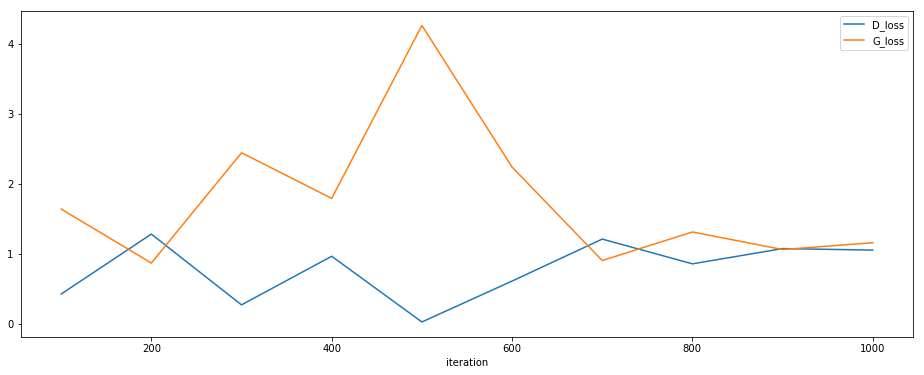

In [21]:
loss_log = np.load('./models/loss_log.npy')

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
plt.plot(loss_log[:,0], loss_log[:,1])
plt.plot(loss_log[:,0], loss_log[:,2])
ax.legend(["D_loss", 'G_loss'])
ax.set_xlabel('iteration')
fig.savefig('./res/loss_log', bbox_inches='tight')
